In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

#Jupyter magic command
%matplotlib inline

In [2]:
mpg_ds = np.genfromtxt('mpg.csv', delimiter=',',
                        names=True, dtype=None, encoding='utf-8',
                        converters={3:lambda x: float(x.replace('?','0')),
                                    7:lambda x: x.replace('1','USA').replace('2','EU').replace('3','JP')})

print("Shape:", mpg_ds.shape, '\n')
print(mpg_ds[0:5])

Shape: (398,) 

[(18., 8, 307., 130., 3504, 12. , 70, 'USA', 'chevrolet chevelle malibu')
 (15., 8, 350., 165., 3693, 11.5, 70, 'USA', 'buick skylark 320')
 (18., 8, 318., 150., 3436, 11. , 70, 'USA', 'plymouth satellite')
 (16., 8, 304., 150., 3433, 12. , 70, 'USA', 'amc rebel sst')
 (17., 8, 302., 140., 3449, 10.5, 70, 'USA', 'ford torino')]


In [3]:
mpg_ds = mpg_ds[mpg_ds['horsepower'] > 0]

print("Shape:", mpg_ds.shape, '\n')
print(mpg_ds[0:5])

Shape: (392,) 

[(18., 8, 307., 130., 3504, 12. , 70, 'USA', 'chevrolet chevelle malibu')
 (15., 8, 350., 165., 3693, 11.5, 70, 'USA', 'buick skylark 320')
 (18., 8, 318., 150., 3436, 11. , 70, 'USA', 'plymouth satellite')
 (16., 8, 304., 150., 3433, 12. , 70, 'USA', 'amc rebel sst')
 (17., 8, 302., 140., 3449, 10.5, 70, 'USA', 'ford torino')]


Text(0.5, 1.0, 'Car Model Distribution by Origin')

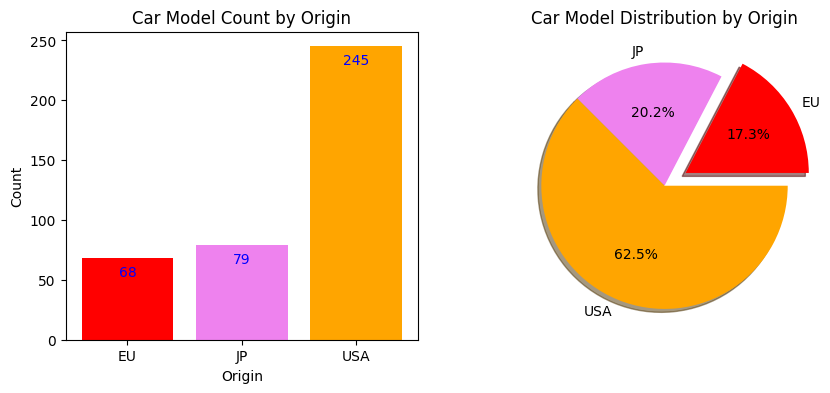

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
bar_ax, pie_ax = ax

origins, counts = np.unique(mpg_ds['origin'], return_counts=True)

# Bar chart
bar_chart = bar_ax.bar(origins, counts, color=['red', 'violet', 'orange'])

# Customize chart attributes
bar_ax.set_title("Car Model Count by Origin")
bar_ax.set_xlabel('Origin')
bar_ax.set_ylabel("Count")

# Customize to add annotation (data label)
for x,y in np.stack((origins, counts), axis=1):
    y = int(y)
    bar_ax.annotate(y, (x,y), ha='center', color='blue', xytext=(x,y-15))

pie_chart = pie_ax.pie(counts, labels=origins, colors=['red', 'violet', 'orange'],
                        autopct='%1.1f%%', shadow = True, explode=(0.2, 0, 0))
pie_ax.set_title("Car Model Distribution by Origin")

### EDA

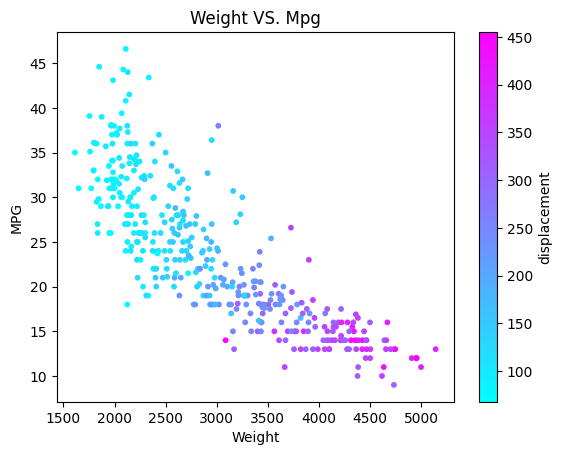

In [9]:
weights = mpg_ds['weight']
mpgs = mpg_ds['mpg']
disps = mpg_ds['displacement']

# Draw scatter chart
scatter_chart = plt.scatter(weights, mpgs, s=10, c=disps, cmap='cool')

plt.title("Weight VS. Mpg")
plt.xlabel("Weight")
plt.ylabel('MPG')

plt.colorbar(scatter_chart, label='displacement',
            orientation='vertical', location='right', pad=0.05)